In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import k, m_p, e
plt.style.use(["science", "notebook", "grid"])

# Print versions
import sys
print("Python version: ", sys.version[:7])
print("Numpy version: ", np.__version__)
print("Matplotlib version: ", plt.matplotlib.__version__)

Python version:  3.11.2 
Numpy version:  1.24.2
Matplotlib version:  3.7.1


## The distributions
---

\begin{equation}
    f(E)= \frac{1}{e^{\beta(E-\mu)} + \alpha}
    \begin{cases}
      \alpha = +1, & \text{Fermi-Dirac distribution}\\
      \alpha = 0, & \text{Maxwell-Boltzmann distribution}  \\
      \alpha = -1, & \text{Bose Einstien distribution}
    \end{cases}
\end{equation}


In [3]:
def general_distribution(T:np.ndarray, alpha:float, E:float, mu:float = 0) -> np.ndarray:
    """General distribution function for a system in thermal equilibrium.
    Args:
        T (float): Temperature of the system.
        alpha (float): factor for the distribution function.
        E (float): Energy of the system.
        mu (float, optional): Chemical potential of the system. Defaults to 0.
    Returns:
        np.ndarray: General distribution function.
    """
    beta : np.ndarray = 1/(k*T)
    exp_factor : np.ndarray = beta*(E - mu)
    return np.exp(-exp_factor) / (1 + alpha * np.exp(-exp_factor))

def Fermi_Dirac_distribution(T:float, E:np.ndarray, mu:float = 0) -> np.ndarray:
    """Fermi-Dirac distribution function for a system in thermal equilibrium.
    Args:
        T (float): Temperature of the system.
        E (np.ndarray): Energy of the system.
        mu (float, optional): Chemical potential of the system. Defaults to 0.
    Returns:
        np.ndarray: Fermi-Dirac distribution function.
    """
    return general_distribution(T, 1, E, mu)

def Maxwell_Boltzmann_distribution(T:float, E:np.ndarray, mu:float = 0) -> np.ndarray:
    """Maxwell-Boltzmann distribution function for a system in thermal equilibrium.
    Args:
        T (float): Temperature of the system.
        E (np.ndarray): Energy of the system.
        mu (float, optional): Chemical potential of the system. Defaults to 0.
    Returns:
        np.ndarray: Maxwell-Boltzmann distribution function.
    """
    return general_distribution(T, 0, E, mu)

def Bose_Einstein_distribution(T:float, E:np.ndarray, mu:float = 0) -> np.ndarray:
    """Bose-Einstein distribution function for a system in thermal equilibrium.
    Args:
        T (float): Temperature of the system.
        E (np.ndarray): Energy of the system.
        mu (float, optional): Chemical potential of the system. Defaults to 0.
    Returns:
        np.ndarray: Bose-Einstein distribution function.
    """
    return general_distribution(T, -1, E, mu)

def Maxwell_Boltzmann_velocity_distribution(v:np.ndarray, T:float, m:float) -> np.ndarray:
    """Maxwell-Boltzmann velocity distribution function for a system in thermal equilibrium.
    Args:
        v (np.ndarray): Velocity of the system.
        T (float): Temperature of the system.
        m (float): Mass of the system.
    Returns:
        np.ndarray: Maxwell-Boltzmann velocity distribution function."""
    c


## Question 1
---
Plot the Maxwell-Boltzmann statistical distribution function at different temperatures, T = 10 K, 300 K, 700 K, 1000 K w.r.t $E/k_B$ (take the x-range from 0 to 5000 K), where E is the energy of the particle and $k_B$ is the Boltzmann constant ($\mu$, the chemical potential has been put to zero).

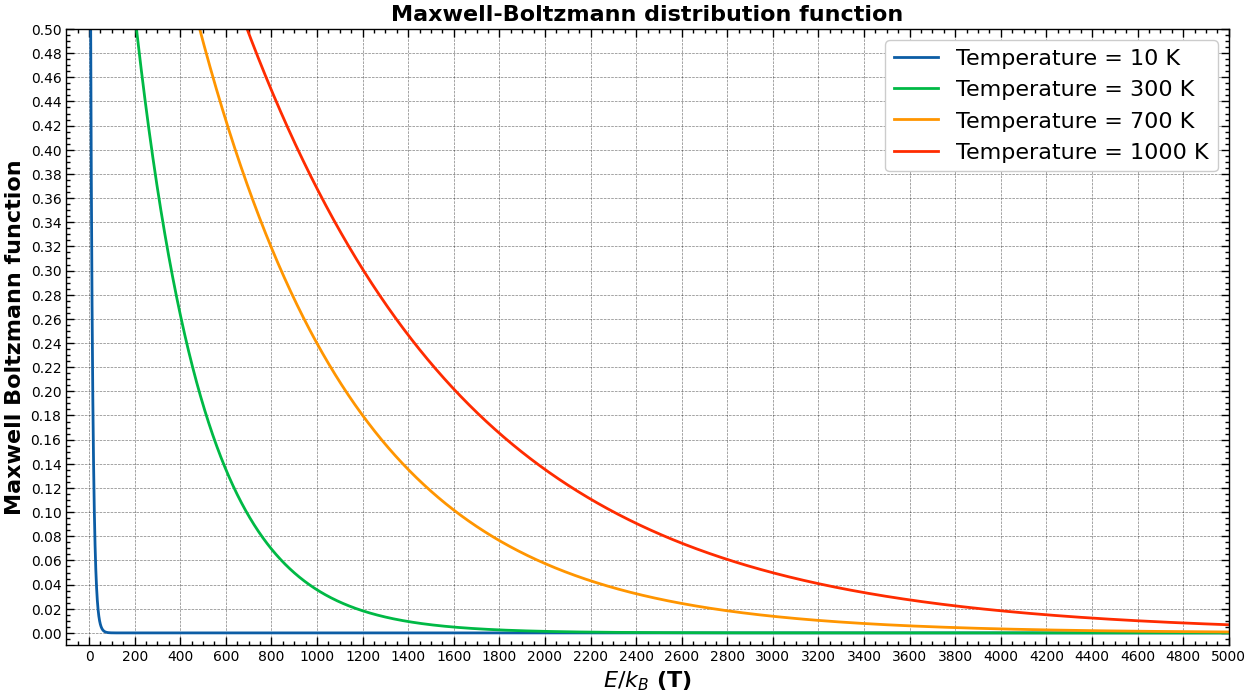

In [4]:
Temps = np.array([10, 300, 700, 1000])
E_vals_by_kb = np.linspace(1, 5000, 100000)
energy = E_vals_by_kb*k


fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

for T in Temps:
    ax.locator_params(axis="both", nbins=40)
    ax.plot(E_vals_by_kb, Maxwell_Boltzmann_distribution(T, energy), label=f"Temperature = {T} K")
    ax.set_xlim(-100, 5000)
    ax.set_ylim(-0.01, 0.5)

ax.set_xlabel(r"$E/k_B$ (T)", fontsize=16, fontweight="bold")
ax.set_ylabel("Maxwell Boltzmann function", fontsize=16, fontweight="bold")

plt.title("Maxwell-Boltzmann distribution function", fontsize=16, fontweight="bold")
ax.legend(fontsize=16)

## Question 2
--- 
**Studying the Maxwell-Boltzmann Speed Distribution function:**

1. Plot the Maxwell-Boltzmann speed distribution function at different temperatures,T =10K,100K and 300K and 700K with respect to v,where v is the speed of a Hydrogen molecule (mass, m = 2×mass of a proton). Take the speeds of the molecules to be in the range of 0 m/s to 8000 m/s.

In [5]:
# Constants
m_H = 2 * m_p # Mass of hydrogen molecule in SI units
temps = np.array([10, 100, 300, 700]) # In Kelvin

velocities = np.linspace(0, 8000, 100000) # In m/s

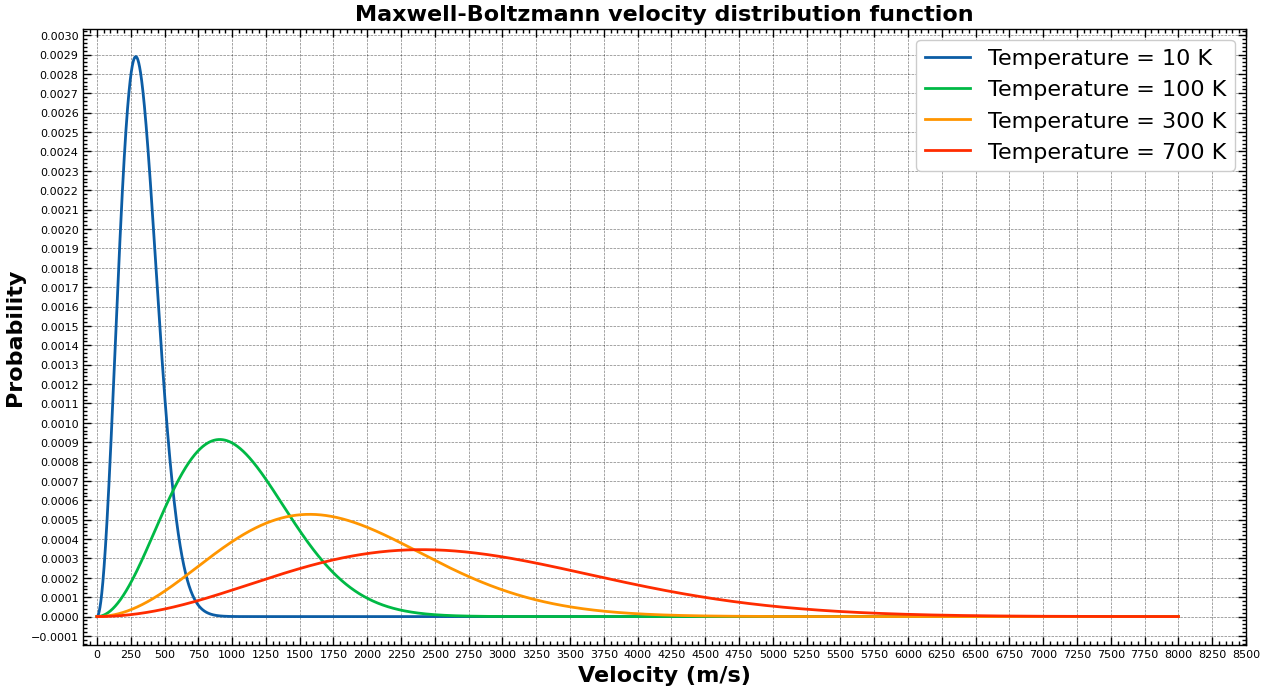

In [6]:
# Graphing
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

for T in temps:
    ax.locator_params(axis="both", nbins=40)
    ax.plot(velocities, Maxwell_Boltzmann_velocity_distribution(velocities, T, m_H), 
            label=f"Temperature = {T} K")
    ax.set_xlim(-100, 8500)
    ax.set_ylabel("Probability", fontsize=16, fontweight="bold")
    ax.set_xlabel("Velocity (m/s)", fontsize=16, fontweight="bold")

plt.title("Maxwell-Boltzmann velocity distribution function", fontsize=16, fontweight="bold")
ax.legend(fontsize=16)

2. What happens to the distribution function as the temperature increases? Justify in terms of the maximum speed and the mean speed of the molecules corresponding to different temperatures.

The maximum speed for the temperatures will remain the same, but the mean speed will increase as the temperature increases.

Let us find the mean speed for the different temperatures using the following equation:

\begin{equation}
    \bar{v} = \frac{\sum_{i=1}^{N} v_i f(v_i)}{\sum_{i = 1}^{N} f(v_i)}
\end{equation}



In [7]:
def get_mean_velocity(velocities:np.ndarray, distribution:np.ndarray) -> float:
    """Calculates the mean velocity of a system in thermal equilibrium.
    Args:
        velocities (np.ndarray): Velocity of the system.
        distribution (np.ndarray): Distribution function of the system.
    Returns:
        float: Mean velocity of the system.
    """
    return np.sum(velocities * distribution) / np.sum(distribution)

In [8]:
mean_velocities = np.array([get_mean_velocity(\
                        velocities, Maxwell_Boltzmann_velocity_distribution(\
                        velocities, T, m_H)) for T in temps])

for temp, mean_vel in zip(temps, mean_velocities):
    print(f"Mean velocity for a temperature of {temp} K is {mean_vel} m/s.")

Mean velocity for a temperature of 10 K is 324.188651687792 m/s.
Mean velocity for a temperature of 100 K is 1025.1745309124126 m/s.
Mean velocity for a temperature of 300 K is 1775.6543739434544 m/s.
Mean velocity for a temperature of 700 K is 2712.014460957921 m/s.


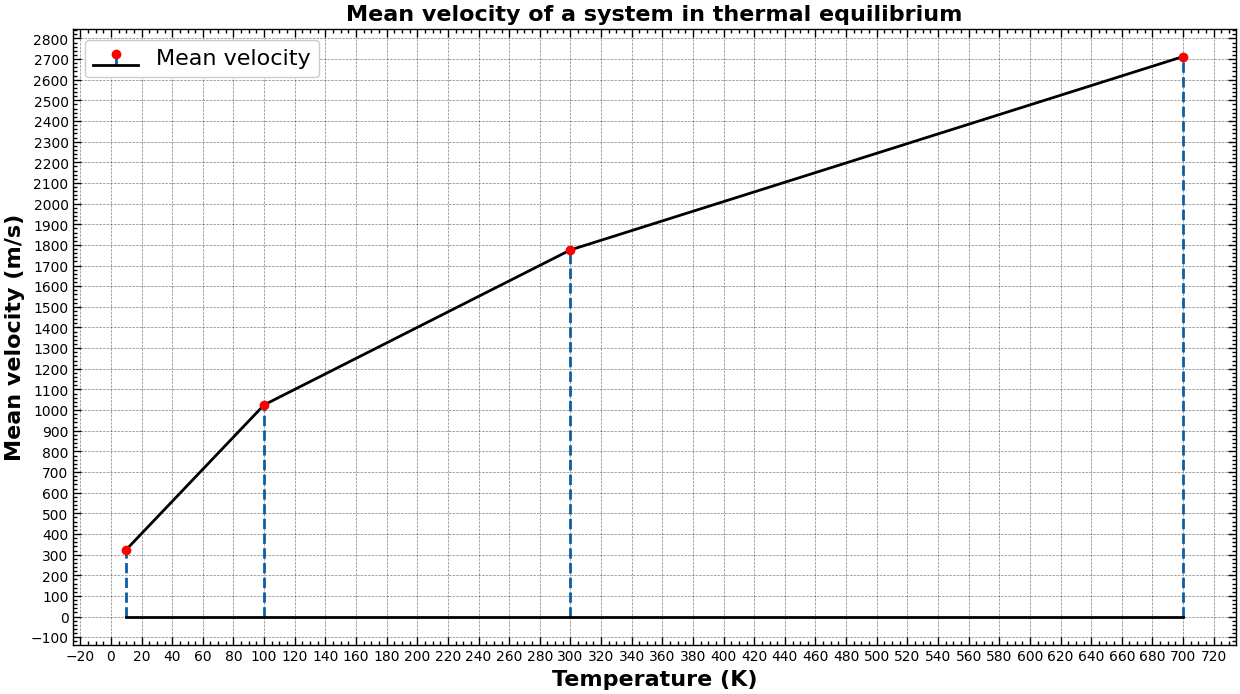

In [9]:
plt.figure(figsize=(15, 8))
plt.plot(temps, mean_velocities, "k-")
plt.stem(temps, mean_velocities, "p--", markerfmt="ro", basefmt="k-", label = "Mean velocity")

plt.title("Mean velocity of a system in thermal equilibrium", fontsize=16, fontweight="bold")

plt.xlabel("Temperature (K)", fontsize=16, fontweight="bold")
plt.ylabel("Mean velocity (m/s)", fontsize=16, fontweight="bold")

plt.locator_params(axis="both", nbins=40)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(fontsize=16)

3. What is the area under the curve for different temperatures? Integrate numerically using the `quad` function in `scipy.integrate` (take the limits as 0 and $\infty$ for the integral) for the temperatures given. Are they same? Justify your answer theoretically.

In [10]:
from scipy.integrate import quad, quad_vec

In [11]:
def get_area_under_graph(distribution, *args) -> float:
    """Returns the area under the given distribution function.
    Args:
        distribution (function): Distribution function.
        *args: Arguments to be passed to the distribution function.
    Returns:
        float: Area under the given distribution function.
    """
    integral, error =  quad(distribution, 0, np.inf, args = (*args,))
    return integral, error

In [12]:
for temp in temps:
    area, error = get_area_under_graph(Maxwell_Boltzmann_velocity_distribution, \
                                       temp, m_H)
    print(f"Area under the graph at {temp} K is {area : .3f} m/s. +/- \{error} m/s.")

Area under the graph at 10 K is  1.000 m/s. +/- \1.905098803464538e-09 m/s.
Area under the graph at 100 K is  1.000 m/s. +/- \1.2505274115109491e-08 m/s.
Area under the graph at 300 K is  1.000 m/s. +/- \1.2359032838018527e-08 m/s.
Area under the graph at 700 K is  1.000 m/s. +/- \1.001571798515928e-08 m/s.


## Question 3
---

Plot the Bose-Einstein (B.E) distribution function at different temperatures, T = 0.1K, 1K, 5K, 10K and 20K, as a function of 
$
\frac{E - \mu}{k_B}
$
, where E is the energy of the particle, $\mu$ is the chemical potential and $k_B$ is the Boltzmann constant. Take the range for x-axis to be between 0 to 50 K. Observe how the function diverges when  $E\; \rightarrow \; \mu$. What happens as the temperature is increased at this limit?

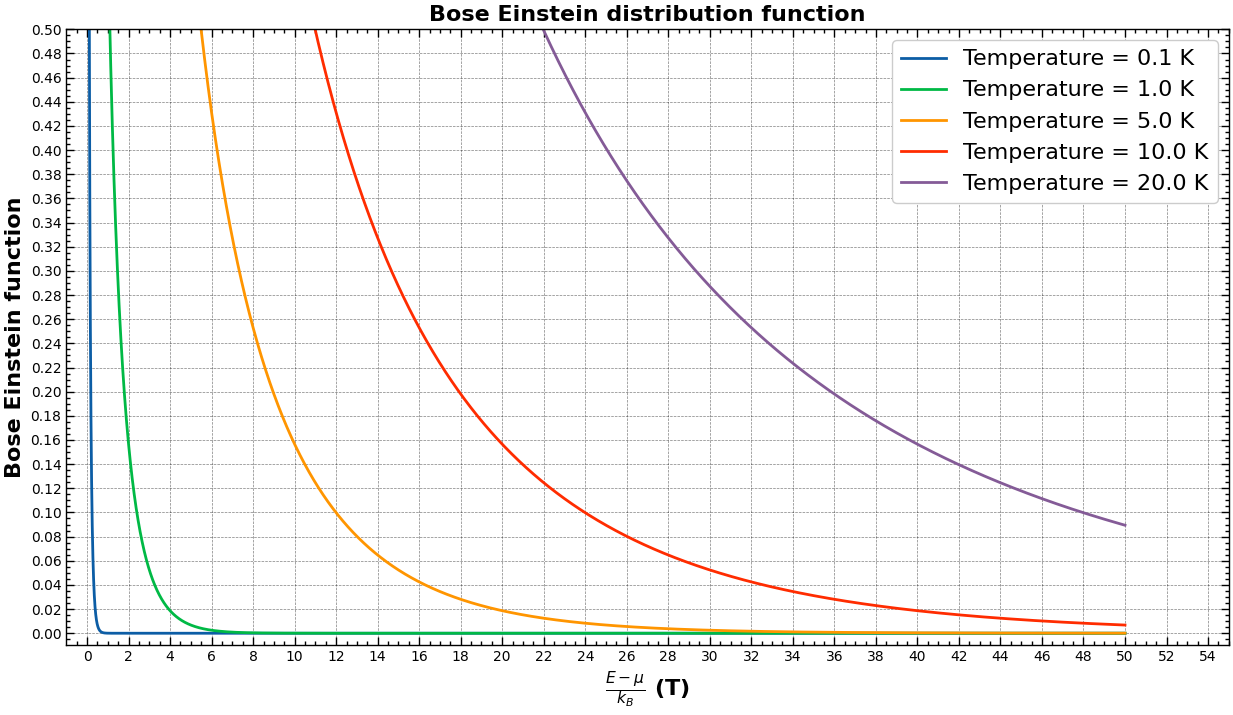

In [13]:
Temps = np.array([.1, 1, 5, 10, 20]) # In Kelvin
E_vals_by_kb = np.linspace(0.001, 50, 100000)
energy = E_vals_by_kb*k


fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

for T in Temps:
    ax.locator_params(axis="both", nbins=40)
    ax.plot(E_vals_by_kb, Bose_Einstein_distribution(T, energy), label=f"Temperature = {T} K")
    ax.set_xlim(-1, 55)
    ax.set_ylim(-0.01, 0.5)

ax.set_xlabel(r"$\frac{E-\mu}{k_B}$ (T)", fontsize=16, fontweight="bold")
ax.set_ylabel("Bose Einstein function", fontsize=16, fontweight="bold")

plt.title("Bose Einstein distribution function", fontsize=16, fontweight="bold")
ax.legend(fontsize=16);

**REMARK:** At the point of divergence (as $E \rightarrow \mu$), if the temperature is increased, the curve rises up and towards right.

## Question 4
---

Plot the Fermi-Dirac distribution function at different temperatures T = 0.1K, 1K, 5K, 10K, 20K, as a function of $\frac{(E − E_F )}{k_B}$ , where E is the energy of the particle, $E_F$ is the Fermi energy level and kB is the Boltzmann constant (take the range for x-axis to be between -50 to 50 K). What happens to the distribution function as E goes from being greater than $E_F$ to less than $E_F$ ? What happens to the distribution function at T = 0 K? How does the distribution function behave when the temperature is increased?

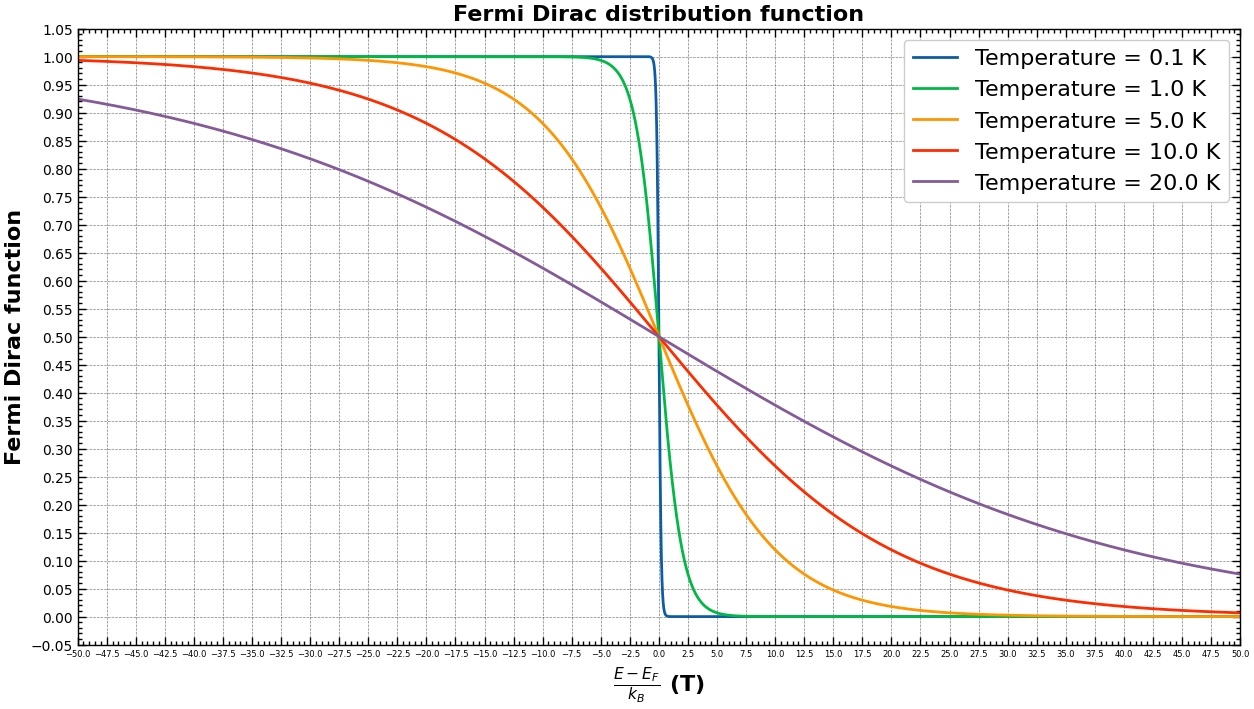

In [14]:
Ef = 0.1 * e # In Joules (in place of Fermi energy, replacing mu)
E_minus_Ef_by_kb = np.linspace(-50, 50, 10000)
energy = E_minus_Ef_by_kb * k + Ef 

temps = np.array([0.1, 1,  5, 10, 20]) # In Kelvin

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 10)

for T in temps:
    ax.locator_params(axis="both", nbins=40)
    ax.plot(E_minus_Ef_by_kb, Fermi_Dirac_distribution(T, energy, Ef), 
            label=f"Temperature = {T} K")
    ax.set_xlim(-50, 50)

ax.set_xlabel(r"$\frac{E-E_F}{k_B}$ (T)", fontsize=16, fontweight="bold")
ax.set_ylabel("Fermi Dirac function", fontsize=16, fontweight="bold")

plt.title("Fermi Dirac distribution function", fontsize=16, fontweight="bold")
ax.legend(fontsize=16);

**REMARKS**:
- The distributionattains to $\frac{1}{2}$ as $E - E_F$ tends to 0.
- When $E>>E_F$, the distribution tends to 0.
- When $E<<E_F$, the distribution tends to 1.
- At T=0K, the distribution function is a step function and rapidly approaches 1 as $E$ approaches $E_F$.

## Question 5
---

Compare the three distriution functions $(f(E))$ as a function of $\frac{(E−\mu)}{k_BT}$ (in the range -5 to +5) in a plot, with the y-axis being plotted in log-scale ($10^{−2}$ ≤ $f(E)$ ≤ $10^2$) (refer to `Fig (2)`). Conclude about the behaviour of the three distribution functions in comparison to one another.

In [15]:
def modified_general_func(exp_factor:np.ndarray, alpha:int) -> np.ndarray:
    """Returns the modified general function.
    Args:
        exp_factor (np.ndarray): Exponential factor.
        alpha (int): Alpha value.
        alpha = 1 for Fermi-Dirac distribution.
        alpha = -1 for Bose-Einstein distribution.
        alpha = 0 for Maxwell-Boltzmann distribution.
    Returns:
        np.ndarray: Modified general function.
    """
    return np.exp(-exp_factor) / (1 + np.exp(-exp_factor)*alpha)    

In [16]:
# Constants
E_minus_mu_by_KbT = np.linspace(-5, 5, 100000) # Unitless
alpha_MB = 0 # Maxwell-Boltzmann distribution
alpha_FD = -1 # Fermi-Dirac distribution
alpha_BE = 1 # Bose-Einstein distribution

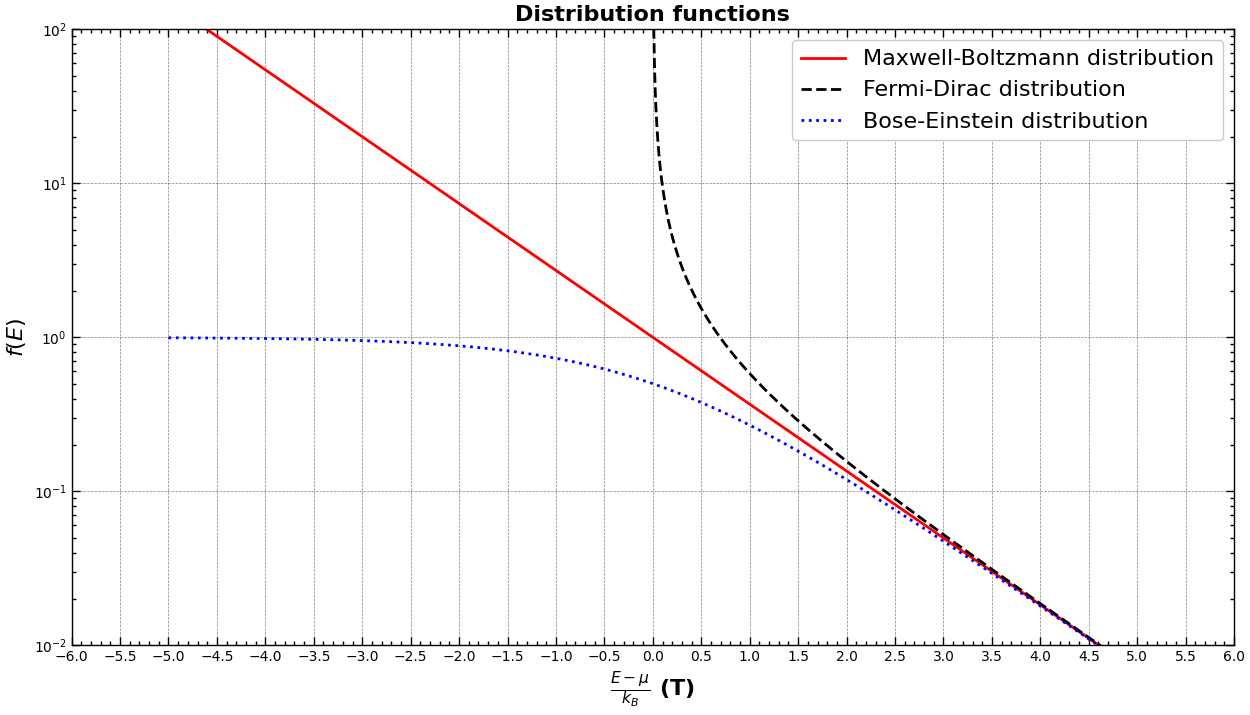

In [17]:
# Plot the data with the y scale being in log

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.yscale("log")

ax.locator_params(axis="x", nbins=40)
ax.locator_params(axis="y", numticks=40)

ax.plot(E_minus_mu_by_KbT, modified_general_func(E_minus_mu_by_KbT, alpha_MB), 'r',
        label="Maxwell-Boltzmann distribution")

# The x range for the fermi dirac function is being modfoed a little to 
# avoid the singularity at x = 0
ax.plot(E_minus_mu_by_KbT[E_minus_mu_by_KbT > 0.005], 
        modified_general_func(E_minus_mu_by_KbT[E_minus_mu_by_KbT > 0.005], alpha_FD), 'k--',
        label="Fermi-Dirac distribution")

ax.plot(E_minus_mu_by_KbT, modified_general_func(E_minus_mu_by_KbT, alpha_BE), 'b:',
        label="Bose-Einstein distribution")

ax.set_xlabel(r"$\frac{E-\mu}{k_B}$ (T)", fontsize=16, fontweight="bold")
ax.set_ylabel("$f(E)$", fontsize=16, fontweight="bold")

plt.ylim(1e-2, 1e2)
plt.xlim(-6, 6)

plt.title("Distribution functions", fontsize=16, fontweight="bold")
ax.legend(fontsize=16);

## Question 6
---
**Simulating Maxwell-Boltzmann velocity distribution with random errors and fitting it:**

(a) Generate a dataset using Maxwell’s velocity distribution function for Hydrogen molecule, at a given temperature T = 700 K, as a function of velocity, ranging from 0 to 8000 m/s (use 100 equi-spaced data points with random errors). Random errors should be drawn from the Gaussian distribution with zero mean and arbitrary standard deviation.

(b) Now, using the curve fitting tool in scipy.optimize, fit the above generated data to find the best fit temperature (T). Comment on how well this temperature matches the temperature used to generate the data-set.


In [18]:
# Constants
np.random.seed(4)
TEMPERATURE = 700 # In Kelvin
velocity_limits = (0, 8000) # In m/s
Num_points = 100
m_H = 2 * m_p # Mass of hydrogen molecule in kg, m_p = mass of proton in kg

# Gausian distribution Hyperparameters
mean = 0 # In m/s
std = .00004 # In m/s

velocities = np.linspace(*velocity_limits, Num_points) # In m/s

exact_distribution_vals = Maxwell_Boltzmann_velocity_distribution(velocities, TEMPERATURE, m_H)
errors = np.random.normal(loc=mean, scale=std, size=Num_points)
noisy_distribution_vals = exact_distribution_vals + errors

#### Curve fitting

In [19]:
from scipy.optimize import curve_fit

In [20]:
def model_for_fitting(v:np.ndarray, T:float) -> np.ndarray:
    """Returns the model for fitting.
    Args:
        v (np.ndarray): Velocity of the system.
        T (float): Temperature of the system.
    Returns:
        np.ndarray: Maxwell-Boltzmann velocity distribution function."""
    return Maxwell_Boltzmann_velocity_distribution(v, T, m_H)

popt, pcov = curve_fit(model_for_fitting, velocities, noisy_distribution_vals, 
                       p0 = [TEMPERATURE])


print(f"Actual temperature = {TEMPERATURE} K")
print(f"Fitted temperature = {popt[0]:.3f} +- {np.sqrt(pcov[0, 0]):.4f} K")

Actual temperature = 700 K
Fitted temperature = 701.641 +- 18.8795 K


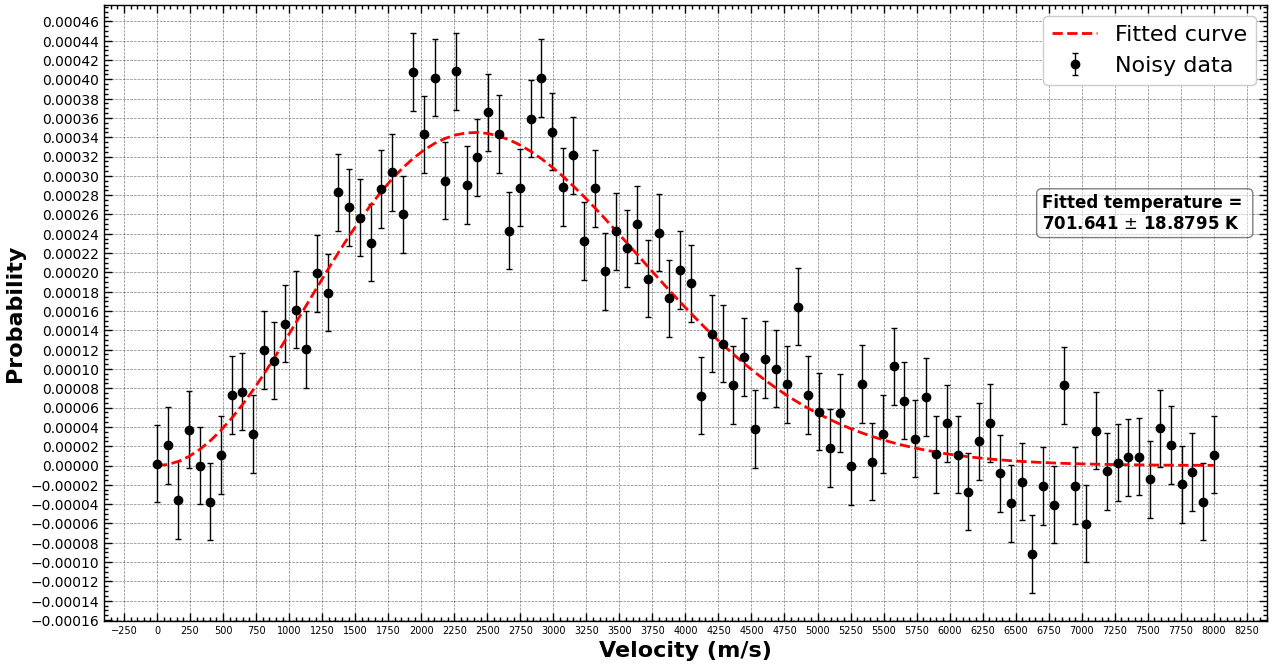

In [21]:
plt.figure(figsize=(15, 8))
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 10)

plt.locator_params(axis = "both", nbins = 40)

plt.xlabel("Velocity (m/s)", fontsize=16, fontweight="bold")
plt.ylabel("Probability", fontsize=16, fontweight="bold")

error_bars = np.full(Num_points, std)

plt.errorbar(velocities, noisy_distribution_vals, yerr=error_bars, fmt='ko', ecolor='k',
             elinewidth=1, capsize=2, label="Noisy data")
plt.plot(velocities, model_for_fitting(velocities, *popt),'r--', label="Fitted curve")

text = f"Fitted temperature = \n{popt[0]:.3f} $\pm$ {np.sqrt(pcov[0, 0]):.4f} K"
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.75, 0.6, text, fontsize=12, fontweight = "bold", transform=plt.gcf().transFigure, 
         bbox=props)

plt.legend(fontsize=16);

**REMARK**:  
The fitted temperature matches quite well with the temperature used to generate the data-set.
The error in the fitted temperature has been indicated in the plot alongwith the fitted temperature.